In [1]:
import random

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'1.10.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

# load Fashion MNIST data set
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# store human readable labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# inspect training data size
train_images.shape, len(train_labels)

((60000, 28, 28), 60000)

In [6]:
# inspect test data size
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

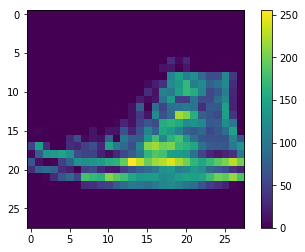

In [7]:
# inspect a random image
image_index = random.randint(0, len(train_images))

plt.figure()
plt.imshow(train_images[image_index])
plt.colorbar()
plt.show()

In [8]:
# scale values to range from 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

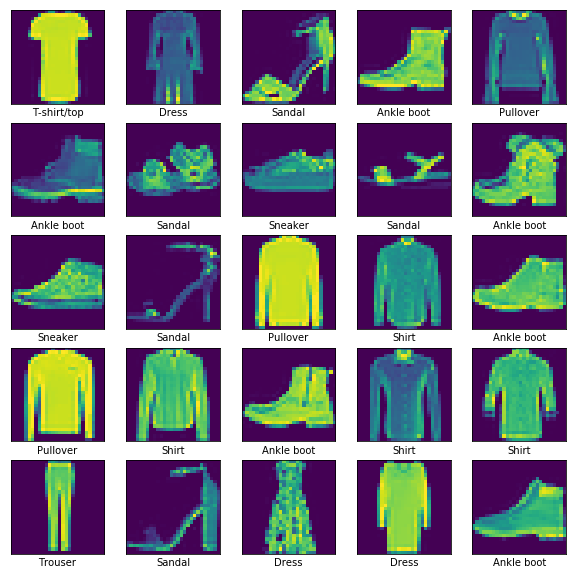

In [9]:
# inspect some random images
image_indices = list(range(0, len(train_labels)))
random.shuffle(image_indices)

plt.figure(figsize=(10,10))

for i in range(0, 25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[image_indices[i]])
    plt.xlabel(class_names[train_labels[image_indices[i]]])

In [10]:
# layer setup
model = keras.Sequential([
    # layer to flatten images data from 2D 28x28 arrays to 1D arrays
    keras.layers.Flatten(input_shape=(28, 28)),
    # layer of neurons
    keras.layers.Dense(128, activation=tf.nn.relu),
    # softmax probability layer of 10 probabilities
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
# compile model with some options
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    optimizer=tf.train.AdamOptimizer()
)

In [11]:
# train the model on the training data
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.5009 - acc: 0.8244
Epoch 2/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.3737 - acc: 0.8654
Epoch 3/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.3374 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3120 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.2942 - acc: 0.8903


In [13]:
# test trained model against testing data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
test_accuracy

10000/10000 [==============================] - 0s 25us/step


0.8725

In [14]:
predictions = model.predict(test_images)

In [20]:
random_index = random.randint(0, len(predictions))
random_prediction = predictions[random_index]
np.argmax(random_prediction) == test_labels[random_index]

False

In [69]:
# Create methods to display prediction information
def plot_image(i, predictions_array, true_labels, images):
    
    prediction, true_label, img = predictions_array[i], true_labels[i], images[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    
    predicted_label = np.argmax(prediction)
    
    color = 'red'
    
    if predicted_label == true_label:
        color = 'blue'
        
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100.0 * np.max(prediction),
        class_names[true_label]),
        color=color
    )

def plot_value_array(i, predictions_array, true_labels, given_true_label=None):
    
    prediction, true_label = predictions_array[i], true_labels[i]
    
    if given_true_label:
        true_label = given_true_label
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    this_plot = plt.bar(range(10), prediction, color="#777777")
    plt.ylim([0, 1])
    
    predicted_label = np.argmax(prediction)
    this_plot[predicted_label].set_color('red')
    
    this_plot[true_label].set_color('blue')

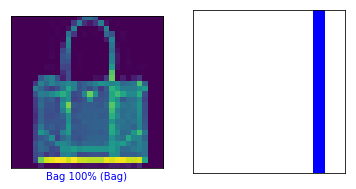

In [70]:
# show a prediction
random_index = random.randint(0, len(predictions))

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)

plot_image(random_index, predictions, test_labels, test_images)

plt.subplot(1, 2, 2)

plot_value_array(random_index, predictions, test_labels)

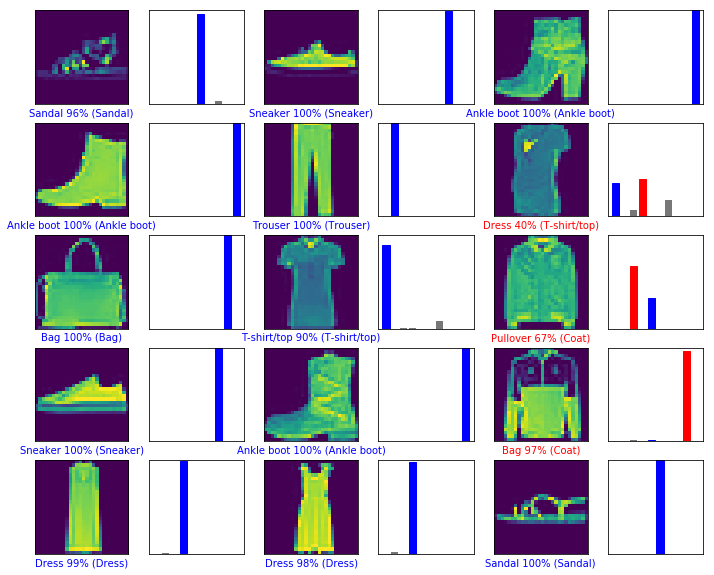

In [71]:
# show 15 predictions
predictions_indices = list(range(0, len(predictions)))
random.shuffle(predictions_indices)

num_rows = 5

num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(0, num_images):
    
    index = predictions_indices[i]
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    
    plot_image(index, predictions, test_labels, test_images)
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    
    plot_value_array(index, predictions, test_labels)

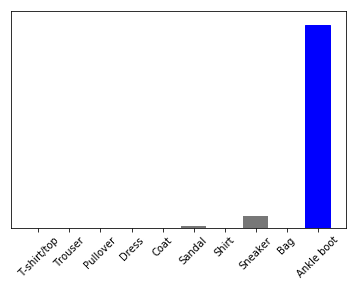

In [80]:
# prediction details against single image
random_index = random.randint(0, len(predictions))
img = test_images[random_index]

# img.shape => (28, 28)

# place image into array (predictions occur in batches, even if batch of one)
img = np.expand_dims(img, 0)
# img.shape => (1, 28, 28)

predictions = model.predict(img)

true_labels = [test_labels[random_index]]
plot_value_array(0, predictions, true_labels)

_ = plt.xticks(range(10), class_names, rotation=45)
